Digital Image Processing

Student: Anderson Rafhael; 18113000

Processamento de Imagens Coloridas

In [105]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cv2 as cv

In [106]:
# General Functions

def normalize(min, max, zz):
  return ((max-min) * ((zz - np.min(zz)) / (np.max(zz) - np.min(zz)))).astype(int) + min


def showImage(img):
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    plt.subplot(121)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) 
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    
    
def show2Images(img1, img2, imageTittles = np.full(2, " ")):
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    plt.subplot(121)
    plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)) 
    plt.title(imageTittles[0])
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122) 
    plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.title(imageTittles[1])
    plt.xticks([]), plt.yticks([])
  


def showImages(img1, img2, img3, img4, imageTittles = np.full(4, " ")):
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    plt.subplot(141)
    plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)) 
    plt.title(imageTittles[0])
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(142) 
    plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)) 
    plt.title(imageTittles[1])
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(143) 
    plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)) 
    plt.title(imageTittles[2])
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(144)
    plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB)) 
    plt.title(imageTittles[3])
    plt.xticks([]), plt.yticks([])
    
    plt.show()

> Executar os códigos que  correspondem aos resultados dos slides 28, 29, 30, 31 e 32 da aula de segmentação.

- Slide 28


<Figure size 640x480 with 0 Axes>

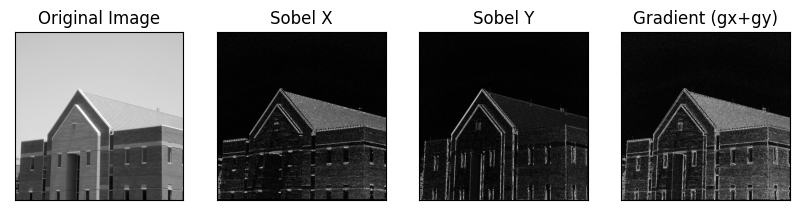

In [107]:
img = cv.imread('img/building.tif')

sobelOperatorX = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

sobelOperatorY = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

imgSobelX = cv.filter2D(img, cv.CV_64F, sobelOperatorX)
imgSobelY = cv.filter2D(img, cv.CV_64F, sobelOperatorY)

dstSobelX = np.abs(imgSobelX).astype(np.uint8)
dstSobelY = np.abs(imgSobelY).astype(np.uint8)

dstGradient = (np.abs(imgSobelX) + np.abs(imgSobelY)).astype(np.uint8)

showImages(img, dstSobelX, dstSobelY, dstGradient, ["Original Image", "Sobel X", "Sobel Y", "Gradient (gx+gy)"])





- Slide 29

<Figure size 640x480 with 0 Axes>

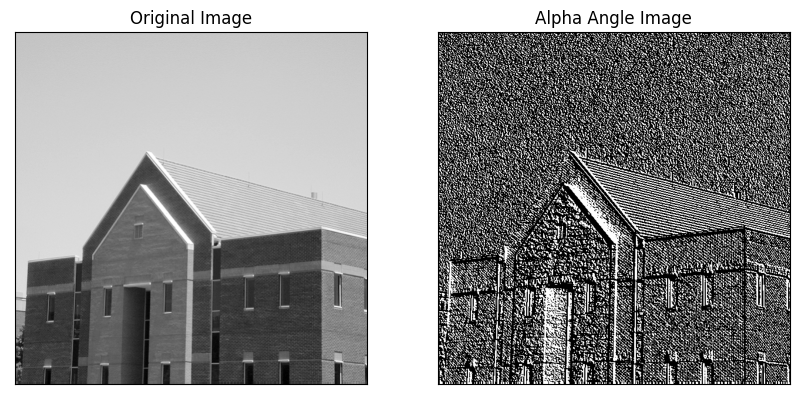

In [108]:
img = cv.imread('img/building.tif')

sobelOperatorX = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

sobelOperatorY = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

imgSobelX = cv.filter2D(img, cv.CV_64F, sobelOperatorX)
imgSobelY = cv.filter2D(img, cv.CV_64F, sobelOperatorY)



alphaAngleImage = np.arctan2(imgSobelY, imgSobelX).astype(np.uint8)

norm = np.zeros((800, 800))

#dst = normalize(0, 255, alphaAngleImage)
dst = cv.normalize(alphaAngleImage, norm, 0, 255, cv.NORM_MINMAX)

show2Images(img, dst, ["Original Image", "Alpha Angle Image"])

- Slide 30

<Figure size 640x480 with 0 Axes>

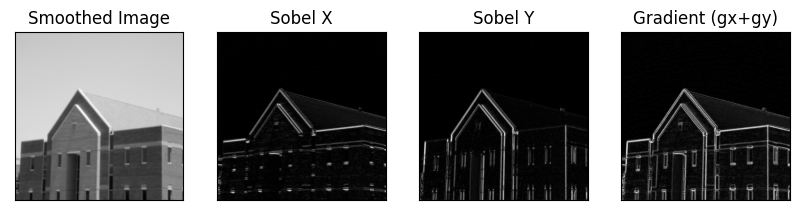

In [109]:
img = cv.imread('img/building.tif')
blurImage = cv.blur(img, (5, 5))

sobelOperatorX = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

sobelOperatorY = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

blurImgSobelX = cv.filter2D(blurImage, cv.CV_64F, sobelOperatorX)
blurImgSobelY = cv.filter2D(blurImage, cv.CV_64F, sobelOperatorY)

dstBlurSobelX = np.abs(blurImgSobelX).astype(np.uint8)
dstBlurSobelY = np.abs(blurImgSobelY).astype(np.uint8)

dstBlurGradient = (np.abs(dstBlurSobelX) + np.abs(dstBlurSobelY)).astype(np.uint8)

showImages(blurImage, dstBlurSobelX, dstBlurSobelY, dstBlurGradient, ["Smoothed Image", "Sobel X", "Sobel Y", "Gradient (gx+gy)"])





- Slide 31

<Figure size 640x480 with 0 Axes>

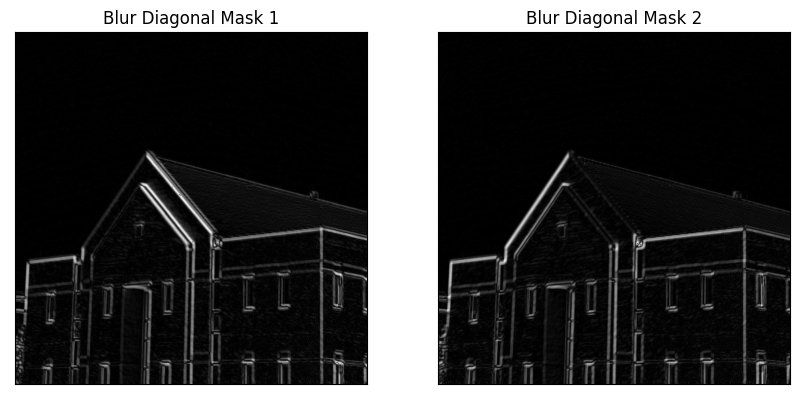

In [110]:
img = cv.imread('img/building.tif')
blurImage = cv.blur(img, (5, 5))

diagonalSobelX = np.array([[0, 1, 2],
                           [-1, 0, 1],
                           [-2, -1, 0]])

diagonalSobelY = np.array([[-2, -1, 0],
                           [-1, 0, 1],
                           [0, 1, 2]])

blurImgDiagSobelX = cv.filter2D(blurImage, cv.CV_64F, diagonalSobelX)
blurImgDiagSobelY = cv.filter2D(blurImage, cv.CV_64F, diagonalSobelY)

dstBlurDiagonalSobelX = np.abs(blurImgDiagSobelX).astype(np.uint8)
dstBlurDiagonalSobelY = np.abs(blurImgDiagSobelY).astype(np.uint8)

show2Images(dstBlurDiagonalSobelX, dstBlurDiagonalSobelY, ["Blur Diagonal Mask 1", "Blur Diagonal Mask 2"])



- Slide 32

<Figure size 640x480 with 0 Axes>

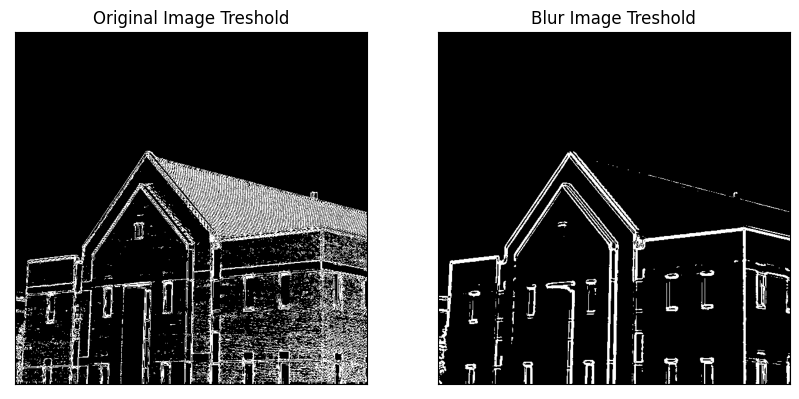

In [111]:
_, dstThreshold = cv.threshold(dstGradient, dstGradient.max()*0.33,255,cv.THRESH_BINARY)
_, dstBlurThreshold = cv.threshold(dstBlurGradient, dstBlurGradient.max()*0.33,255,cv.THRESH_BINARY)

show2Images(dstThreshold, dstBlurThreshold, ["Original Image Treshold", "Blur Image Treshold"])